## Importing Libraries

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Description

In [228]:
data=pd.read_csv('train.csv')
x_train=data.iloc[:,0:-1]
y_train=data.iloc[:,-1]
data2=pd.read_csv('x_test.csv')
x_test = data2.iloc[:,:]
data3=pd.read_csv('y_test.csv')
y_test=data3.iloc[:,-1]
data.head()


,loan_id,age,education,proof_submitted,loan_amount,asset_cost,no_of_loans,no_of_curr_loans,last_delinq_none,loan_default
0,1,27,1.0,Aadhar,504264,820920,2,2,0,0
1,2,48,1.0,Aadhar,728556,831444,6,2,0,0
2,3,30,2.0,VoterID,642936,826092,0,0,0,1
3,4,28,1.0,Aadhar,746556,930924,0,0,0,0
4,5,29,1.0,Aadhar,1139880,1902000,0,0,0,0


In [229]:
data.shape

(7000, 10)

In [230]:
data.isnull().sum()

loan_id               0
age                   0
education           245
proof_submitted       0
loan_amount           0
asset_cost            0
no_of_loans           0
no_of_curr_loans      0
last_delinq_none      0
loan_default          0
dtype: int64

In [231]:
x_test.isnull().sum()

loan_id              0
age                  0
education           92
proof_submitted      0
loan_amount          0
asset_cost           0
no_of_loans          0
no_of_curr_loans     0
last_delinq_none     0
dtype: int64

In [232]:
data=data.dropna()
# x_test = x_test.dropna()
# x_test.shape

In [233]:
data.isnull().sum()

loan_id             0
age                 0
education           0
proof_submitted     0
loan_amount         0
asset_cost          0
no_of_loans         0
no_of_curr_loans    0
last_delinq_none    0
loan_default        0
dtype: int64

In [234]:
data.duplicated().sum()
x_test.duplicated().sum()

0

In [235]:
# from sklearn.preprocessing import LabelEncoder
# lb2=LabelEncoder()
# x_train_with_proof[:,3]=lb2.fit_transform(x_train_with_proof[:,3])
# x_test_with_proof[:,3] = lb2.fit_transform(x_test_with_proof[:,3])

In [236]:
# x_train_with_proof[:,:]

In [237]:
x_train=x_train.drop('proof_submitted',axis=1)
x_test = x_test.drop('proof_submitted',axis=1)

In [238]:
good = data[data['loan_default']==0]
defaulter = data[data['loan_default']==1]
defaulter.shape

(2704, 10)

In [239]:
good.shape

(4051, 10)

## Visualization




<ipython-input-240-0bcfc308d506>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr();


<Axes: >

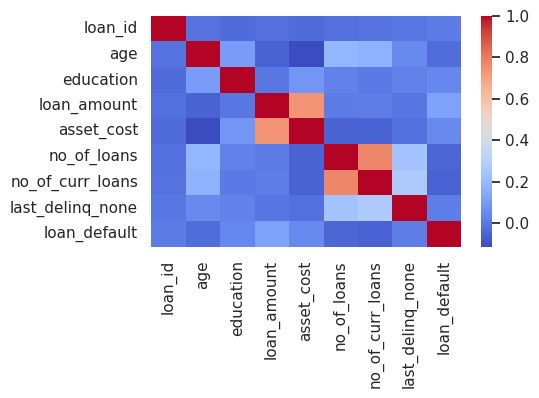

In [240]:
correlation_matrix = data.corr();
sns.heatmap(correlation_matrix, annot=False, cmap = 'coolwarm')

In [241]:
def target_mean(data,feature,target,decimal=2):
    sns.countplot(data=data, y=feature, order = data[feature].value_counts().index)
    sns.set(rc={"figure.figsize": (5, 3)})
    return(data.groupby(feature).agg({target: "mean"}).sort_values(by=[target],ascending=[False]).round(decimal))

The above function:

It creates a count plot using Seaborn's countplot function to visualize the distribution of the specified feature values. The order parameter specifies the order in which the feature values should be displayed in the plot, based on their frequency.

It calculates the mean of the target variable (target) for different values of the specified feature. This is done by grouping the data by the feature and using the agg method with the target variable to calculate the mean.

It sorts the grouped data based on the mean value of the target variable in descending order.

It rounds the mean values to the specified number of decimal places using the round method.

It returns the resulting DataFrame containing the mean values for different feature values.

,loan_default
proof_submitted,
VoterID,0.48
Driving,0.46
PAN,0.41
Aadhar,0.39
Passport,0.17


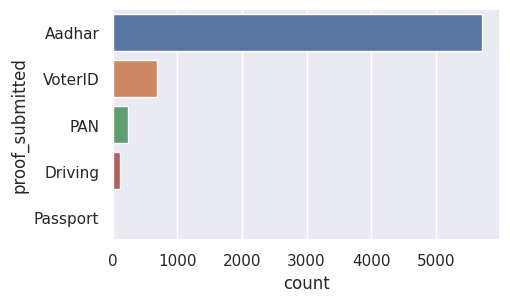

In [242]:
target_mean(data,'proof_submitted','loan_default')

In [243]:
edu1= data[data['education']==1.0]
edu2= data[data['education']==2.0]
print(edu1.shape,edu2.shape)

(2959, 10) (3796, 10)


,loan_default
education,
2.0,0.42
1.0,0.38


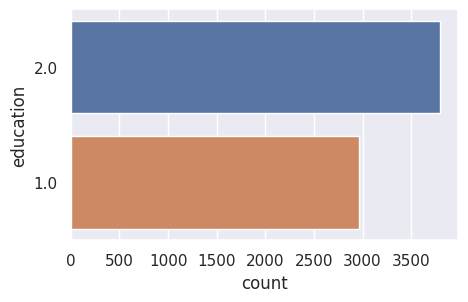

In [244]:
target_mean(data,'education','loan_default')

,loan_default
last_delinq_none,
1,0.47
0,0.40


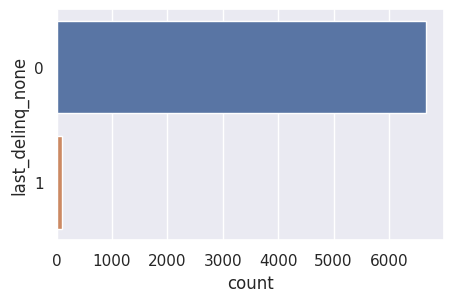

In [245]:
target_mean(data,'last_delinq_none','loan_default')

## Pre-Processing

In [246]:
# to standardize/scale all the values so that there is no preference of any specific feature with higher values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
# x_train_with_proof = sc.fit_transform(x_train_with_proof)
# x_test_with_proof = sc.transform(x_test_with_proof)

# to account for nan values (as RandomForestClassifier cannot handle nan values). so change the nan values to the mean of the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
x_train_imputed = imputer.fit_transform(x_train)
# x_train_with_proof_imputed = imputer.fit_transform(x_train_with_proof)
# x_test_with_proof_imputed = imputer.fit_transform(x_test_with_proof)
x_test_imputed = imputer.fit_transform(x_test)

## Training, Predicting, Evaluation using Random Forest

### Training

In [247]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120,criterion='entropy',max_depth=100, min_samples_split=7)

In [248]:
rf.fit(x_train_imputed,y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_split=7,
                       n_estimators=120)

In [249]:
# rf.fit(x_train_with_proof_imputed,y_train)

### Predicting

In [250]:
x_test_imputed

array([[ 1.73229826, -0.93533993, -1.13263667, ..., -0.1559498 ,
         0.28726461, -0.11603707],
       [ 1.73279313, -1.0671416 , -1.13263667, ...,  0.02681407,
         0.74406886, -0.11603707],
       [ 1.733288  , -1.0671416 , -1.13263667, ..., -0.52147754,
        -0.62634388, -0.11603707],
       ...,
       [ 3.21542864,  0.90988338, -1.13263667, ..., -0.1559498 ,
         0.28726461, -0.11603707],
       [ 3.21592351, -0.53993494,  0.88289566, ..., -0.52147754,
        -0.62634388, -0.11603707],
       [ 3.21641838,  0.77808172,  0.88289566, ...,  0.39234181,
         1.2008731 , -0.11603707]])

In [251]:
y_predict=rf.predict(x_test_imputed)

In [252]:
# y_predit_with_proof = rf.predict(x_test_with_proof_imputed)

### Evaluation

In [253]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

n_error = (y_predict!=y_test).sum()
acc= accuracy_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
recall=recall_score(y_test,y_predict)
prec = precision_score(y_test,y_predict)
print("No. of errors in the predicted values are {} out of {} values".format(n_error,y_test.shape[0]))
print("The accuracy is {:.3f}".format(acc))
print("The f1 score is {:.3f}".format(f1))
print("The Precision is {:.3f}".format(prec))
print("The recall is {:.3f}".format(recall))


No. of errors in the predicted values are 1460 out of 3000 values
The accuracy is 0.513
The f1 score is 0.678
The Precision is 1.000
The recall is 0.513


In [254]:
# from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

# n_error = (y_predit_with_proof!=y_test).sum()
# acc= accuracy_score(y_test,y_predit_with_proof)
# f1 = f1_score(y_test,y_predit_with_proof)
# recall=recall_score(y_test,y_predit_with_proof)
# prec = precision_score(y_test,y_predit_with_proof)
# print("No. of errors in the predicted values are {} out of {} values".format(n_error,y_test.shape[0]))
# print("The accuracy is {:.3f}".format(acc))
# print("The f1 score is {:.3f}".format(f1))
# print("The Precision is {:.3f}".format(prec))
# print("The recall is {:.3f}".format(recall))

## Training, Predicting, Evaluation using KNN

In [255]:
from sklearn.neighbors import KNeighborsClassifier
lr=KNeighborsClassifier(n_neighbors=3,algorithm='brute',weights='uniform',metric='chebyshev')
lr.fit(x_train_imputed,y_train)
y_predict_lr = lr.predict(x_test_imputed)

### Evaluation

In [256]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

n_error = (y_predict_lr!=y_test).sum()
acc= accuracy_score(y_test,y_predict_lr)
f1 = f1_score(y_test,y_predict_lr)
recall=recall_score(y_test,y_predict_lr)
prec = precision_score(y_test,y_predict_lr)
print("No. of errors in the predicted values are {} out of {} values".format(n_error,y_test.shape[0]))
print("The accuracy is {:.3f}".format(acc))
print("The f1 score is {:.3f}".format(f1))
print("The Precision is {:.3f}".format(prec))
print("The recall is {:.3f}".format(recall))

No. of errors in the predicted values are 1727 out of 3000 values
The accuracy is 0.424
The f1 score is 0.596
The Precision is 1.000
The recall is 0.424
